**Tugas Pertemuan 2 - Pre-Processing Data Berita detik.com**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/data_berita_detik.csv")
df.head(6)

,judul,tanggal,isi,kategori
0,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga
1,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"1,705 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga
2,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga
3,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"2,550 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga
4,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga
5,Meriahnya Penutupan Paralimpiade 2024,"Senin, 09 Sep 2024 11:10 WIB",Paris - Paralimpiade 2024 berakhir dan resmi d...,Olahraga


**CLEANING**


---



**Cleaning Data** adalah proses pemrosesan teks awal  yang bertujuan untuk membersihkan  data  teks dari elemen yang tidak perlu atau mengganggu, seperti:
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [3]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,tanggal,isi,kategori,cleansing
0,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...
1,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"1,705 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...
2,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...
3,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"2,550 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...
4,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...
5,Meriahnya Penutupan Paralimpiade 2024,"Senin, 09 Sep 2024 11:10 WIB",Paris - Paralimpiade 2024 berakhir dan resmi d...,Olahraga,Paris Paralimpiade berakhir dan resmi ditutu...


**CASE FOLDING**


---



**Casefolding** adalah langkah prapemrosesan yang mencakup mengubah semua karakter dalam teks menjadi huruf kecil. Tujuan dari casefolding adalah
adalah  untuk menghilangkan ambiguitas yang mungkin timbul akibat perbedaan huruf besar  dan kecil.
Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan  dianggap sebagai entitas yang berbeda.

In [4]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding
0,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...
1,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"1,705 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...
2,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...
3,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"2,550 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...
4,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...
5,Meriahnya Penutupan Paralimpiade 2024,"Senin, 09 Sep 2024 11:10 WIB",Paris - Paralimpiade 2024 berakhir dan resmi d...,Olahraga,Paris Paralimpiade berakhir dan resmi ditutu...,paris paralimpiade berakhir dan resmi ditutu...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** Tujuannya adalah untuk mengelompokkan kemunculan  kata dalam proses berikut.
Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [5]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize
0,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...,"[uganda, pelari, maraton, olimpiade, uganda, r..."
1,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"1,705 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...,"[presiden, joko, widodo, jokowi, meresmikan, p..."
2,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...,"[jakarta, jorge, martin, cuma, finis, ke, di, ..."
3,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"2,550 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...,"[marc, marquez, tak, menduga, dia, bakal, meme..."
4,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...,"[prancis, paralimpiade, paris, resmi, berakhir..."
5,Meriahnya Penutupan Paralimpiade 2024,"Senin, 09 Sep 2024 11:10 WIB",Paris - Paralimpiade 2024 berakhir dan resmi d...,Olahraga,Paris Paralimpiade berakhir dan resmi ditutu...,paris paralimpiade berakhir dan resmi ditutu...,"[paris, paralimpiade, berakhir, dan, resmi, di..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yakni sebagai tahap pemilihan kata-kata yang
dianggap tidak penting atau kata yang tidak relevan.Untuk mengetahui kata mana yang
tidak relevan berdasarkan dari daftar stopword removal yang digunakan.

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [7]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,Potret Pelari Maraton Uganda yang Tewas Dibaka...,"Senin, 09 Sep 2024 13:30 WIB",Uganda - Pelari maraton Olimpiade Uganda Rebec...,Olahraga,Uganda Pelari maraton Olimpiade Uganda Rebecc...,uganda pelari maraton olimpiade uganda rebecc...,"[uganda, pelari, maraton, olimpiade, uganda, r...",uganda pelari maraton olimpiade uganda rebecca...
1,Jokowi Resmikan Pembangunan-Renovasi Venue PON...,"1,705 Views | Senin, 09 Sep 2024 12:03 WIB",Presiden Joko Widodo ( Jokowi ) meresmikan pem...,Olahraga,Presiden Joko Widodo Jokowi meresmikan pemba...,presiden joko widodo jokowi meresmikan pemba...,"[presiden, joko, widodo, jokowi, meresmikan, p...",presiden joko widodo jokowi meresmikan pembang...
2,Dua Kali Ganti Motor Bikin Jorge Martin Gigit ...,"Senin, 09 Sep 2024 13:15 WIB",Jakarta - Jorge Martin cuma finis ke-15 di Mot...,Olahraga,Jakarta Jorge Martin cuma finis ke di MotoGP ...,jakarta jorge martin cuma finis ke di motogp ...,"[jakarta, jorge, martin, cuma, finis, ke, di, ...",jakarta jorge martin finis motogp san marino k...
3,Menangi MotoGP San Marino di Luar Dugaan Marc ...,"2,550 Views | Senin, 09 Sep 2024 12:08 WIB",Marc Marquez tak menduga dia bakal memenangi M...,Olahraga,Marc Marquez tak menduga dia bakal memenangi M...,marc marquez tak menduga dia bakal memenangi m...,"[marc, marquez, tak, menduga, dia, bakal, meme...",marc marquez menduga memenangi motogp san mari...
4,"Paralimpiade Paris 2024 Usai, Indonesia Cetak ...","Senin, 09 Sep 2024 12:08 WIB",Prancis - Paralimpiade Paris 2024 resmi berakh...,Olahraga,Prancis Paralimpiade Paris resmi berakhir Me...,prancis paralimpiade paris resmi berakhir me...,"[prancis, paralimpiade, paris, resmi, berakhir...",prancis paralimpiade paris resmi merah putih m...
5,Meriahnya Penutupan Paralimpiade 2024,"Senin, 09 Sep 2024 11:10 WIB",Paris - Paralimpiade 2024 berakhir dan resmi d...,Olahraga,Paris Paralimpiade berakhir dan resmi ditutu...,paris paralimpiade berakhir dan resmi ditutu...,"[paris, paralimpiade, berakhir, dan, resmi, di...",paris paralimpiade resmi ditutup stade de fran...


In [8]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** mengonversi setiap dokumen teks menjadi vektor yang berisi
frekuensi kemunculan setiap kata dalam dokumen tersebut.Pembobotan TF-IDF
menghitung nilai bobot setiap kata untuk setiap dokumen. Ini dibagi menjadi dua proses
yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung jumlah kemunculan setiap kata dalam dokumen,
dan dengan kemunculan kata terbanyak, nilai kata tersebut adalah yang terbesar.

**IDF (Inverse Document Frequency)** menghitung jumlah dokumen untuk setiap kata yang
jarang muncul dalam dokumen yang dianggap memiliki nilai terbesar. Jika kata tersebut
memiliki banyak kemunculan kata dalam dokumen, hasilnya akan memiliki nilai yang
kecil.

In [9]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv", sep=",")

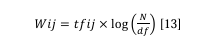

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [11]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aa,abaaba,abadi,abang,abnormal,abon,academy,acar,acara,acaraki,...,zaeni,zaitun,zakaria,zakariaaura,zarco,zat,zeaxanthin,zilazik,zita,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.046487,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036987,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
